# IMPORTING DEPENDENCIES

In [4]:
!mkdir -p data
!gsutil -m cp -r gs://novoic-ml-challenge-text-data/* ./data

Copying gs://novoic-ml-challenge-text-data/LICENSE...
Copying gs://novoic-ml-challenge-text-data/README.md...
Copying gs://novoic-ml-challenge-text-data/data.txt...
/ [3/3 files][468.7 KiB/468.7 KiB] 100% Done                                    
Operation completed over 3 objects/468.7 KiB.                                    


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
nltk.download('stopwords')
import pandas as pd
stopwords= nltk.corpus.stopwords.words('english')
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

import numpy as np
from matplotlib import pyplot
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
with open('data/data.txt', 'r') as f:
    msgs = f.read().splitlines()

# PREPROCESSING STAGE

In [7]:
def filter_text(text):
    text = re.sub(',', ' ', text)
    text = re.sub('\t', ',', text)  
    return text

result=[]

for dat in msgs:
    dat=filter_text(dat)
    print(dat)
    result.append(dat)

Streaming output truncated to the last 5000 lines.
ham,Nope i waiting in sch 4 daddy... 
spam,You have won ?1 000 cash or a ?2 000 prize! To claim  call09050000327
ham,I'm tired of arguing with you about this week after week. Do what you want and from now on  i'll do the same.
ham,Ü wait 4 me in sch i finish ard 5..
spam,our mobile number has won £5000  to claim calls us back or ring the claims hot line on 09050005321.
ham,Arngd marriage is while u r walkin unfortuntly a snake bites u. bt love marriage is dancing in frnt of d snake &amp; sayin Bite me  bite me.
ham,Huh so early.. Then ü having dinner outside izzit?
ham,Ok anyway no need to change with what you said
spam,We tried to contact you re your reply to our offer of 750 mins 150 textand a new video phone call 08002988890 now or reply for free delivery tomorrow
ham,my ex-wife was not able to have kids. Do you want kids one day?
ham,So how's scotland. Hope you are not over showing your JJC tendencies. Take care. Live the dream
ham

CONVERTING THE TEXT INTO A DATAFRAME

In [0]:
data = pd.DataFrame([sub.split(",") for sub in result])

In [0]:
pd.set_option('display.max_colwidth', 0) 

In [10]:
data.columns =['LABEL','SMS']
data.head()

,LABEL,SMS
0,ham,Go until jurong point crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,Nah I don't think he goes to usf he lives around here though


In [11]:
data.groupby('LABEL').describe()

SMS  ...     
      count  ... freq
LABEL        ...     
ham    4827  ...  30 
spam   747   ...  4  

[2 rows x 4 columns]

Text(0.5, 1.0, 'LABEL_COUNT')

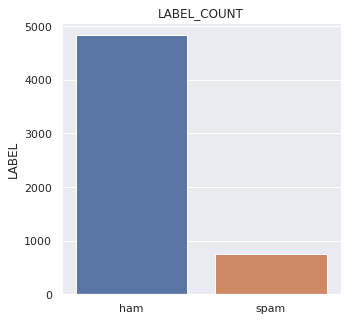

In [12]:
plt.figure(figsize=(5, 5))
sns.set(style="darkgrid")
count_balance=pd.value_counts(data["LABEL"], sort= True)
sns.barplot(x=count_balance.index, y=count_balance)
plt.title('LABEL_COUNT')

By looking at the label counts we can clearly see that is an imbalanced dataset,this has to be taken into consideration when 
evalauting the model. The "Accuracy term " uwon't be that efficient considering the imbalanced dateset, rather precision and recall are betterin these circumstances.However i prefered to consider only having one evaluation metric (F1score) since this considers both(Precision and recall) and considering one paramter makes it easier to decide which model to choose based on the perfomance.

# Extracting Features

In [0]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

def CLEAN(message):
    lower_text=''.join([word.lower() for word in message]) # LOWERING
    tokens=re.split('\W+',lower_text) # TOKENIZING THE TEXT
    CLEANed_text =' '.join([stemmer.stem(x) for x in tokens if x not in stopwords]) # STEMMING AND REMOVING STOPWORDS    
    return CLEANed_text

def count_PUNCT (text):  # COUNTING PUNCTUATION
    #punt=["!","$","£","€", "free","winner"]
    count = sum([1 for x in text if x in string.punctuation])
    return count

In [0]:
data["CLEAN"]=data["SMS"].apply(lambda x: CLEAN(x))

In [0]:
data['LENGTH'] = data['CLEAN'].apply(lambda x : len(x))

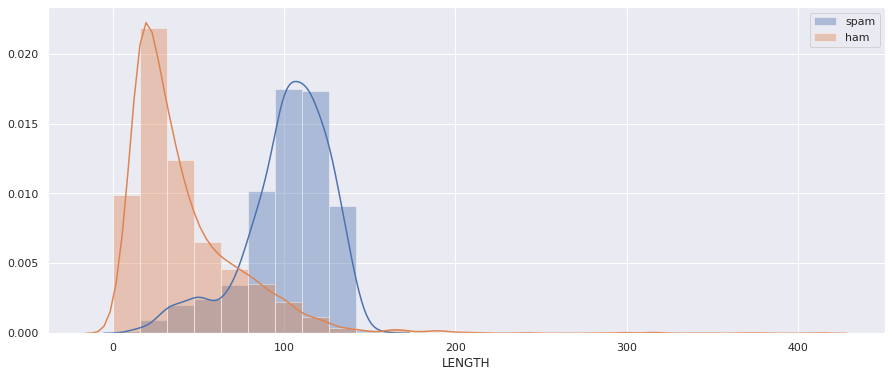

In [16]:
### VISULIZING THE LENGTH OF THE PREPROCESSED TEXT COMPARED IN EACH OF THE CATEGORIES["HAM ,SPAM"]
pyplot.figure(figsize=(15,6))

bins = np.linspace(0,300,num=20)
sns.distplot(data[data['LABEL']=='spam']['LENGTH'],bins,label='spam')
sns.distplot(data[data['LABEL']=='ham']['LENGTH'],bins,label ='ham')
pyplot.legend(loc ='upper right')

In [0]:
data['NUMBERS']=data['SMS'].apply(lambda x : len(re.findall('\d{1,16}',x)))

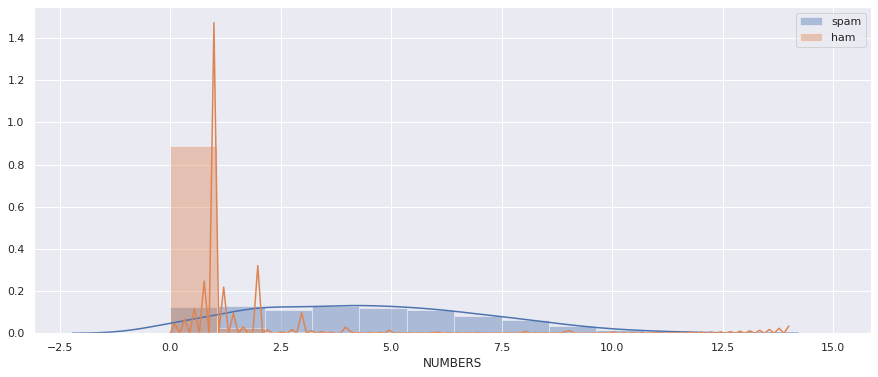

In [18]:
### VISULIZING THE SERIE OF NUMBERS PRESENT IN EACH CATEGORY["HAM ,SPAM"]
pyplot.figure(figsize=(15,6))
bins = np.linspace(0,15,num=15)
sns.distplot(data[data['LABEL']=='spam']['NUMBERS'],bins,label='spam')
sns.distplot(data[data['LABEL']=='ham']['NUMBERS'],bins,label ='ham')
pyplot.legend(loc ='upper right')

In [0]:
data['CAPITAL_TEXT']=data['SMS'].apply(lambda x : len(re.findall('[A-Z$]+',x)))

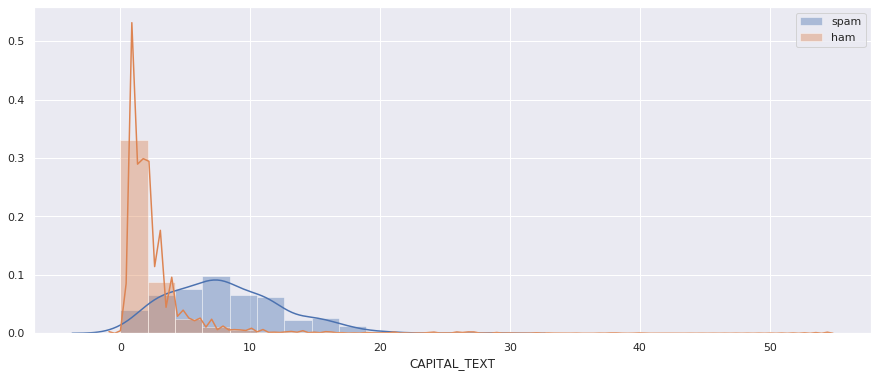

In [20]:
# VISULIZING THE NUMBERS OF TIME A CAPITAL LETTERS APPEAR IN EACH CATEGORY IN A SINGLE MESSAGE["HAM ,SPAM"]
pyplot.figure(figsize=(15,6))
bins = np.linspace(0,40,num=20)
sns.distplot(data[data['LABEL']=='spam']['CAPITAL_TEXT'],bins,label='spam')
sns.distplot(data[data['LABEL']=='ham']['CAPITAL_TEXT'],bins,label ='ham')
pyplot.legend(loc ='upper right')

In [0]:
data['PUNCT'] = data['SMS'].apply(lambda x : count_PUNCT(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


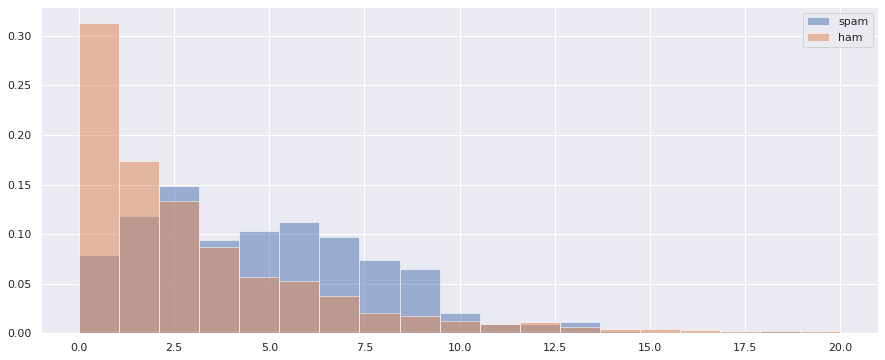

In [22]:
### VISULIZING THE PUNCTUATION APPEARING IN EACH CATEGORY IN A SINGLE MESSAGE["HAM ,SPAM"]
pyplot.figure(figsize=(15,6))

bins = np.linspace(0,20,num=20)
pyplot.hist(data[data['LABEL']=='spam']['PUNCT'],bins,alpha=0.5,label='spam',normed=True)
pyplot.hist(data[data['LABEL']=='ham']['PUNCT'],bins,alpha =0.5,label ='ham', normed=True)
pyplot.legend(loc ='upper right')

In [23]:
data

,LABEL,SMS,CLEAN,LENGTH,NUMBERS,CAPITAL_TEXT,PUNCT
0,ham,Go until jurong point crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...,go jurong point crazi avail bugi n great world la e buffet cine got amor wat,77,0,3,8
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,22,0,2,6
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entri 2 wkli comp win fa cup final tkts 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18,133,6,8,6
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,36,0,2,6
4,ham,Nah I don't think he goes to usf he lives around here though,nah think goe usf live around though,36,0,2,1
...,...,...,...,...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy call 087187272008 NOW1! Only 10p per minute. BT-national-rate.,2nd time tri 2 contact u u 750 pound prize 2 claim easi call 087187272008 now1 10p per minut bt nation rate,108,7,6,7
5570,ham,Will ü b going to esplanade fr home?,ü b go esplanad fr home,24,0,1,1
5571,ham,Pity * was in mood for that. So...any other suggestions?,piti mood suggest,18,0,2,6
5572,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,guy bitch act like interest buy someth els next week gave us free,65,0,2,1


# VISUALIZING THE MOST COMMON WORDS

In [0]:
from collections import Counter
count1 = Counter(" ".join(data[data['LABEL']=='ham']["CLEAN"]).split()).most_common(20)
data1 = pd.DataFrame.from_dict(count1)
data1.columns=["ham_most_words","counts"]

count2 = Counter(" ".join(data[data['LABEL']=='spam']["CLEAN"]).split()).most_common(20)
data2 = pd.DataFrame.from_dict(count2)
data2.columns=["spam_most_words","counts"]

Text(0.5, 1.0, 'Ham_Most_Common_words')

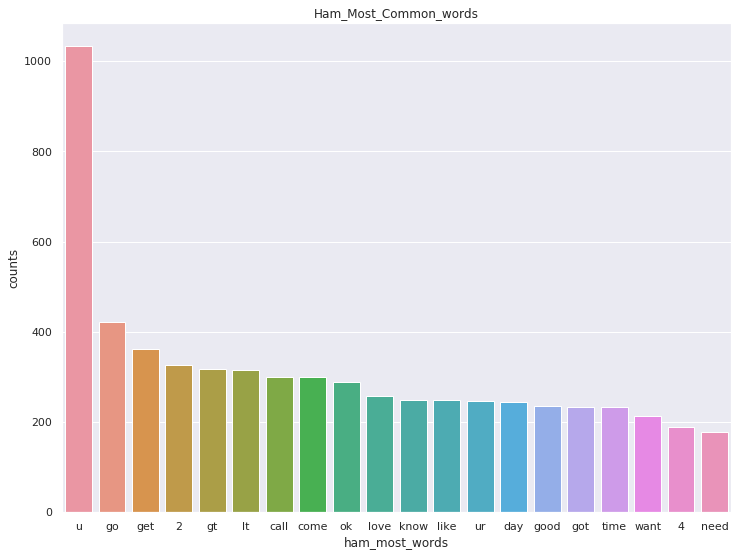

In [25]:
plt.figure(figsize=(12, 9))
sns.set(style="darkgrid")
sns.barplot(x=data1["ham_most_words"], y=data1["counts"])
plt.title('Ham_Most_Common_words')

Text(0.5, 1.0, 'Spam_Most_Common_words')

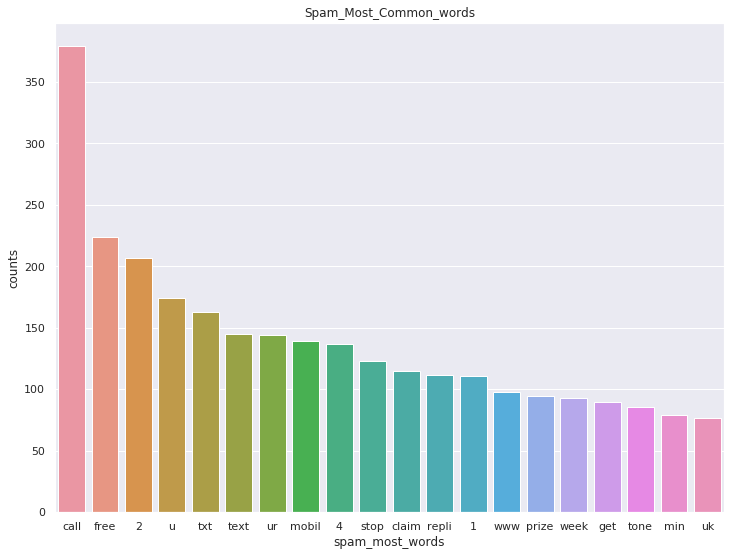

In [26]:
plt.figure(figsize=(12, 9))
sns.barplot(x=data2["spam_most_words"], y=data2["counts"])
plt.title('Spam_Most_Common_words')

In [27]:
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5534,5535,5536,5537,5538,5539,5540,5541,5542,5543,5544,5545,5546,5547,5548,5549,5550,5551,5552,5553,5554,5555,5556,5557,5558,5559,5560,5561,5562,5563,5564,5565,5566,5567,5568,5569,5570,5571,5572,5573
LABEL,ham,ham,spam,ham,ham,spam,ham,ham,spam,spam,ham,spam,spam,ham,ham,spam,ham,ham,ham,spam,ham,ham,ham,ham,ham,ham,ham,ham,ham,ham,ham,ham,ham,ham,spam,ham,ham,ham,ham,ham,...,ham,ham,ham,ham,ham,spam,ham,ham,spam,ham,ham,ham,ham,ham,ham,spam,ham,ham,ham,ham,ham,ham,ham,ham,ham,ham,ham,ham,ham,ham,ham,ham,ham,ham,spam,spam,ham,ham,ham,ham
SMS,Go until jurong point crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...,Ok lar... Joking wif u oni...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,U dun say so early hor... U c already then say...,Nah I don't think he goes to usf he lives around here though,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send £1.50 to rcv,Even my brother is not like to speak with me. They treat me like aids patent.,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030,I'm gonna be home soon and i don't want to talk about this stuff anymore tonight k? I've cried enough today.,SIX chances to win CASH! From 100 to 20 000 pounds txt> CSH11 and send to 87575. Cost 150p/day 6days 16+ TsandCs apply Reply HL 4 info,URGENT! You have won a 1 week FREE membership in our £100 000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,I HAVE A DATE ON SUNDAY WITH WILL!!,XXXMobileMovieClub: To use your credit click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL,Oh k...i'm watching here:),Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet.,Fine if thats the way u feel. Thats the way its gota b,England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES SCOTLAND 4txt/ú1.20 POBOXox36504W45WQ 16+,Is that seriously how you spell his name?,I‘m going to try for 2 months ha ha only joking,So ü pay first lar... Then when is da stock comin...,Aft i finish my lunch then i go str down lor. Ard 3 smth lor. U finish ur lunch already?,Ffffffffff. Alright no way I can meet up with you sooner?,Just forced myself to eat a slice. I'm really not hungry tho. This sucks. Mark is getting worried. He knows I'm sick when I turn down pizza. Lol,Lol your always so convincing.,Did you catch the bus ? Are you frying an egg ? Did you make a tea? Are you eating your mom's left over dinner ? Do you feel my Love ?,I'm back &amp; we're packing the car now I'll let you know if there's room,Ahhh. Work. I vaguely remember that! What does it feel like? Lol,Wait that's still not all that clear were you not sure about me being sarcastic or that that's why x doesn't want to live with us,Yeah he got in at 2 and was v apologetic. n had fallen out and she was actin like spoilt child and he got caught up in that. Till 2! But we won't go there! Not doing too badly cheers. You?,K tell me anything about you.,For fear of fainting with the of all 

# COMBINING THE EXTRACTED FEATURES

In [0]:
Extra_features = pd.concat([data['LENGTH'],data['NUMBERS'],data['PUNCT'],data['CAPITAL_TEXT']],axis=1)

In [29]:
Extra_features.head()

,LENGTH,NUMBERS,PUNCT,CAPITAL_TEXT
0,77,0,8,3
1,22,0,6,2
2,133,6,6,8
3,36,0,6,2
4,36,0,1,2


# SCALING THE FEATURES

In [0]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(Extra_features)
Extra_features_scaled = pd.DataFrame(x_scaled)

In [31]:
Extra_features_scaled.head(5)

,0,1,2,3
0,0.186441,0.000000,0.060150,0.055556
1,0.053269,0.000000,0.045113,0.037037
2,0.322034,0.428571,0.045113,0.148148
3,0.087167,0.000000,0.045113,0.037037
4,0.087167,0.000000,0.007519,0.037037


# Tf Idf method

- Vectorizer is our engine which will take all sentences and convert them into columns
- Convert a collection of text into to a matrix of TF-IDF features(floats)
- It creates columns for the all known words 
- values are assigned based on logic of tf idf method

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
vector_output = vect.fit_transform(data['CLEAN'])
X_data=pd.DataFrame(vector_output.toarray())

In [0]:
# Combining vectorized filtered data["CLEAN"] and combined_features!!!! 
combined_features = pd.concat([Extra_features_scaled,X_data],axis=1)

In [34]:
combined_features.head()

,0,1,2,3,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,7210,7211,7212,7213,7214,7215,7216,7217,7218,7219,7220,7221,7222,7223,7224,7225,7226,7227,7228,7229,7230,7231,7232,7233,7234,7235,7236,7237,7238,7239,7240,7241,7242,7243,7244,7245,7246,7247,7248,7249
0,0.186441,0.000000,0.060150,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.053269,0.000000,0.045113,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.322034,0.428571,0.045113,0.148148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.087167,0.000000,0.045113,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.087167,0.000000,0.007519,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# MODELS CREATION

In [0]:
#Importing Model libraries!!!
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn import feature_extraction, model_selection, naive_bayes, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

Creating the models objects

In [0]:
Svc = SVC(kernel='rbf', gamma=1.0)
Kn = KNeighborsClassifier(n_neighbors=49)
Dt = DecisionTreeClassifier(min_samples_split=7, random_state=111)
Lg = LogisticRegression(solver='liblinear', penalty='l1')
Rf = RandomForestClassifier(n_estimators=50,random_state=111)
Ad = AdaBoostClassifier(n_estimators=62, random_state=111)
Bc = BaggingClassifier(n_estimators=9, random_state=111)

Splitting the Dataset

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_data,data['LABEL'],test_size=0.3, random_state=111)

In [0]:
classifiers = {'Support_Vector' : Svc,
               'K-Neighbours' : Kn,
               'Decision_Trees': Dt,
               'Logistic_Regression': Lg,
               'Random_Forest': Rf,
               'AdaBoost': Ad,
               'Bagging_Classifier': Bc}

In [0]:
def train_model(model, feature_train, LABELs_train):    
    model.fit(feature_train, LABELs_train)

In [0]:
def model_prediction(model, features):
    return (model.predict(features))

Model Training and Evaluation with ONLY THE FILTERED DATA= data["Clean"]

In [41]:
f1_score_prediction1 = []

for k,v in classifiers.items():
    
    print("Classifier: {}".format(k))
    
    ### Training and Predicting 
    train_model(v, X_train, y_train)
    pred = model_prediction(v,X_test)
    
    ### Confusion Matrix 
    m_confusion_test = metrics.confusion_matrix(y_test, pred)
    print(m_confusion_test)
    
    ### Precision, recall, Fscore 
    precision,recall,fscore,support =score(y_test,pred,pos_label='spam', average ='binary')
    f1_score_prediction1.append((k, [fscore]))
    print('Precision : {} / Recall : {} / fscore : {}'.format(round(precision,3),round(recall,3),round(fscore,3)))
    print('\n')

Classifier: Support_Vector
[[1455    1]
 [  42  175]]
Precision : 0.994 / Recall : 0.806 / fscore : 0.891


Classifier: K-Neighbours
[[1454    2]
 [ 123   94]]
Precision : 0.979 / Recall : 0.433 / fscore : 0.601


Classifier: Decision_Trees
[[1430   26]
 [  41  176]]
Precision : 0.871 / Recall : 0.811 / fscore : 0.84


Classifier: Logistic_Regression
[[1449    7]
 [  55  162]]
Precision : 0.959 / Recall : 0.747 / fscore : 0.839


Classifier: Random_Forest
[[1454    2]
 [  36  181]]
Precision : 0.989 / Recall : 0.834 / fscore : 0.905


Classifier: AdaBoost
[[1451    5]
 [  31  186]]
Precision : 0.974 / Recall : 0.857 / fscore : 0.912


Classifier: Bagging_Classifier
[[1434   22]
 [  33  184]]
Precision : 0.893 / Recall : 0.848 / fscore : 0.87




In [43]:
df1 = pd.DataFrame.from_items(f1_score_prediction1,orient='index', columns=['Fscore'])
df1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Fscore
Support_Vector,0.890585
K-Neighbours,0.600639
Decision_Trees,0.840095
Logistic_Regression,0.839378
Random_Forest,0.905000
AdaBoost,0.911765
Bagging_Classifier,0.869976


In [0]:
X_train, X_test, y_train, y_test = train_test_split(combined_features,data['LABEL'], test_size=0.3, random_state=111)

Model Training and Evaluation with messages + extracted Features

In [45]:
f1_score_prediction2 = []

for k,v in classifiers.items():
    
    print("Classifier:{}".format(k))
    
    ### Training and Predicting LABELs ###
    train_model(v, X_train, y_train)
    pred = model_prediction(v,X_test)
    
    ### Confusion Matrix ###
    m_confusion_test = metrics.confusion_matrix(y_test, pred)
    print(m_confusion_test)
    
    ### Precision, recall, Fscore ###
    precision,recall,fscore,support =score(y_test,pred,pos_label='spam', average ='binary')
    f1_score_prediction2.append((k, [fscore]))
    print('Precision : {} / Recall : {} / fscore : {}'.format(round(precision,3),round(recall,3),round(fscore,3)))

Classifier:Support_Vector
[[1454    2]
 [  26  191]]
Precision : 0.99 / Recall : 0.88 / fscore : 0.932
Classifier:K-Neighbours
[[1454    2]
 [  62  155]]
Precision : 0.987 / Recall : 0.714 / fscore : 0.829
Classifier:Decision_Trees
[[1436   20]
 [  24  193]]
Precision : 0.906 / Recall : 0.889 / fscore : 0.898
Classifier:Logistic_Regression
[[1448    8]
 [  35  182]]
Precision : 0.958 / Recall : 0.839 / fscore : 0.894
Classifier:Random_Forest
[[1456    0]
 [  31  186]]
Precision : 1.0 / Recall : 0.857 / fscore : 0.923
Classifier:AdaBoost
[[1444   12]
 [  25  192]]
Precision : 0.941 / Recall : 0.885 / fscore : 0.912
Classifier:Bagging_Classifier
[[1448    8]
 [  23  194]]
Precision : 0.96 / Recall : 0.894 / fscore : 0.926


In [46]:
df2 = pd.DataFrame.from_items(f1_score_prediction2,orient='index',columns=['Fscore2'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


In [47]:
df_final = pd.concat([df1,df2],axis=1)
df_final

,Fscore,Fscore2
Support_Vector,0.890585,0.931707
K-Neighbours,0.600639,0.828877
Decision_Trees,0.840095,0.897674
Logistic_Regression,0.839378,0.894349
Random_Forest,0.905000,0.923077
AdaBoost,0.911765,0.912114
Bagging_Classifier,0.869976,0.926014


In [0]:
FINAL EVALUATION

Text(0.5, 1.0, 'Distribution by Classifiers')

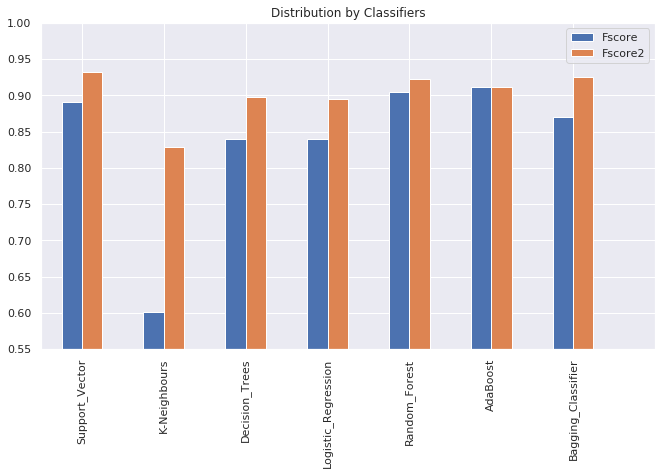

In [50]:
df_final.plot(kind='bar', ylim=(0.55,1.0), figsize=(11,6), align='center')
plt.xticks(np.arange(8), df_final.index)
plt.title('Distribution by Classifiers')

IN TERMS OF BEST MODEL: RANDOM FOREST, SVM AND ADABOOST PERFORMED SIMILIARLY WHEN THE EXTRA FEATURES WERE ADDED AT AROUND 93-94%

However,by looking at the results we can clearly see there is clear evidence that adding the extracted Features such as:
['LENGTH','NUMBERS','PUNCT','CAPITAL_TEXT'] 
to the cleaned text have boosted the performance of the classifiers, meaning a more in depth feature extraction could even bump up the f1scores preformance!